# 6. Sinusoidal Forcing Of A Spring-Mass-Damper System


This notebook introduces external forcing of a vibratory system, where the
external force is modeled as a sinusoidal input to the bottom of a bus driver's
seat.

After the completion of this assignment students will be able to:

- excite a system with a sinusoidal input
- understand the difference in transient and steady state solutions
- use autocorrelation to determine period
- relate the frequency response to the time series
- create a frequency response plot
- define resonance and determine the parameters that cause resonance

# Introduction

We have only been dealing with the free response of a system given some initial coordinate (position, orientation) or speed value (velocity, angular velocity). The behavior observed is the "natural" behavior of the system, i.e. the motion that it would exhibit if no external loads act on the system. For the simple single degree of freedom systems we have dealt with so far it is possible to apply a time varying external force or torque to the system to influence the time trajectory of the single coordinate. For example let's investigate the simplest system in vibrations, a particle that can slide laterally but is fixed to a wall via a linear spring and linear damper and has a sinusoidal force applied to it as it moves:

![](fig/06/Mass-Spring-Damper.svg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from resonance.linear_systems import MassSpringDamperSystem

In [3]:
sys = MassSpringDamperSystem()

The mass, $m$, stiffness of the spring, $k$, and the damping coefficient of the dashpot, $c$, can be set on this model.

In [4]:
sys.constants

{'damping': 0.0, 'mass': 1.0, 'stiffness': 100}

# Undamped Forced Motion

Each system has a function called `sinusoidal_forcing_response()` that works in a similar fashion to `free_response()`. Two new pieces of information are required: the forcing amplitude, $F_o$, and the forcing frequency, $\omega$ as the first two arguments. Set $F_o=.0$ N and $\omega=2\pi$ rad/s and generate a trajectory for 20 seconds.

In [5]:
traj = sys.sinusoidal_forcing_response(1.0, 2 * np.pi, 20.0)

In [6]:
# write your answer here

Notice that there is no longer a simple sinusoidal oscillation. The trajactory seems that it may still be *periodic* but the motion is now some combination of the natural motion and the motion due to the forcing term. 

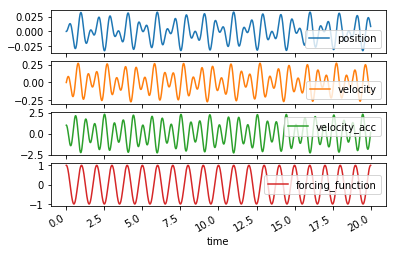

In [7]:
traj.plot(subplots=True);

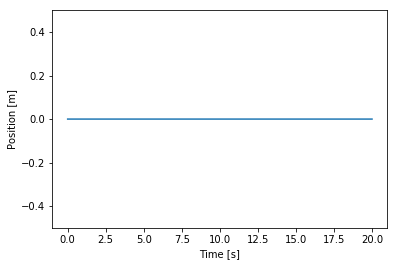

In [8]:
fig, ax = plt.subplots(1, 1)
traj = sys.sinusoidal_forcing_response(0.0, 0.0, 20.0)
lines = ax.plot(traj.index, traj.position)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.set_ylim((-0.5, 0.5))

def adjust_forcing(amplitude=0.0, frequency=0.0):
    traj = sys.sinusoidal_forcing_response(amplitude, frequency, 20.0)
    lines[0].set_data(traj.index, traj.position)

In [9]:
from ipywidgets import interact

interact(adjust_forcing, amplitude=(0.0, 10.0, 0.2), frequency=(0.0, 10 * np.pi, 0.3));

# Forcing at and around the natural frequency

You may have notice some particularly interesting motion in a particular regime of frequencies. It turns out that if you force the system at a frequency near the natural frequency of the system. Simulate the free response of the system and find the natural frequency in radians per second. Investigate the forced trajectory with a 1 Newton forcing amplitude and a forcing frequency slightly less than, slightly more than, and exactly at the natural frequency.

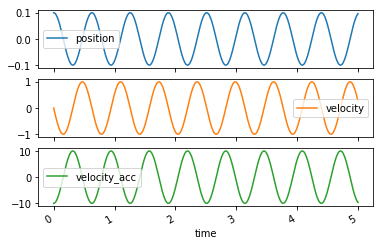

In [10]:
sys.coordinates['position'] = 0.1  # m
traj = sys.free_response(5.0)
traj.plot(subplots=True);

**Exercise**

Estimate the natural frequency.

In [11]:
from resonance.functions import estimate_period
2 * np.pi / estimate_period(traj.index, traj.position)

9.9959766250584341

In [12]:
# write your answer here

# Just lower than the natural frequency

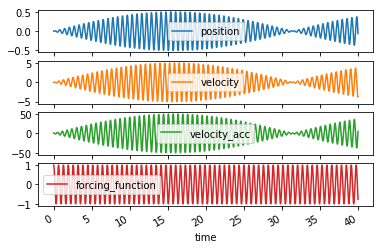

In [13]:
sys.coordinates['position'] = 0.0  # m

traj = sys.sinusoidal_forcing_response(1.0, 9.8, 40.0)

traj.plot(subplots=True);

# Just higher than the natural frequency

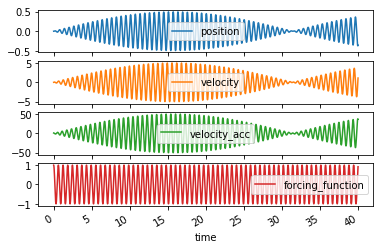

In [14]:
traj = sys.sinusoidal_forcing_response(1.0, 10.2, 40.0)
traj.plot(subplots=True);

This is called *beating*. Beating signals seem to have two primary frequencies, one that is much slower than the other. There is a rapid frequency that is close to the forced frequency and then another that can be estimated with:

$$\omega_{beat} = |\omega_n - \omega|$$

**Exercise**

Calculate the beat frequency and beat period from the above equation and see if it matches the trajectory in the above plot.

In [15]:
w_beat = np.abs(9.9959766250584341 - 10.2)
print(w_beat)

print(2 * np.pi / w_beat)

0.204023374942
30.7963992311


In [16]:
# write you answer here

# Exactly at the natural frequency

See what happens at exactly the natural frequency.

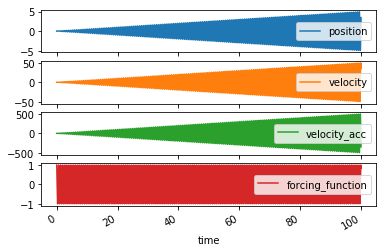

In [17]:
traj = sys.sinusoidal_forcing_response(1.0, 9.9959766250584341, 100.0)

traj.plot(subplots=True);

In [18]:
# write your answer here

# Damping

There is also interesting vibrational behavior when both damping and forcing are introduced to the system. Set $m=100$ kg, $c=100$ kg/s, and $k=910$ N/m and simulate the system's free response for 20 seconds to remind yourself of the behavior. Use an initial position of 0.001 m and initial velocity of 0.02 m/s. What type of vibration is this? (over-, under-, critically-damped, etc)

In [19]:
sys.constants['mass'] = 100  # kg
sys.constants['damping'] = 100  # kg/s
sys.constants['stiffness'] = 910  # N/m

sys.coordinates['position'] = 0.001  # m
sys.speeds['velocity'] = 0.02  # m/s

In [20]:
# write your answer here

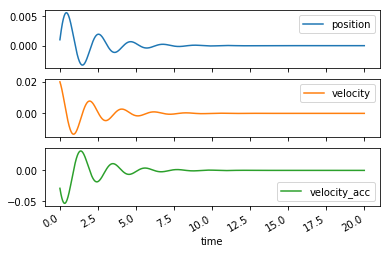

In [21]:
traj = sys.free_response(20)
traj.plot(subplots=True);

# Natural Frequency

The exact value of a linear system's natural frequency can be calculate with:

$$\omega_n = \sqrt{\frac{k}{m}}$$

where $m$ is the system mass and $k$ is the system's stiffness. Calculate this value using the equation above.

In [22]:
np.sqrt(sys.constants['stiffness'] / sys.constants['mass'])

3.0166206257996713

In [23]:
# write your answer here

# Forcing a damped system below it's natural frequency

Subject the system to $F(t) = 10 \cos(1t)$ with the same initial conditions as the previous case. This frequency is well below the natural frequency. Simulate for 5, 10, 20, and 50 seconds.

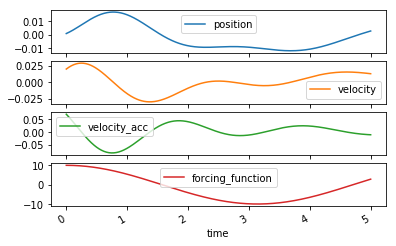

In [24]:
traj = sys.sinusoidal_forcing_response(10.0, 1.0, 5)
traj.plot(subplots=True);

In [25]:
# write your answer here

# Just below the natural frequency

Subject the system to $F(t) = 10 \cos(3t)$ with the same initial conditions as the previous case. This frequency is well below the natural frequency. Simulate for 5, 10, 20, and 50 seconds.

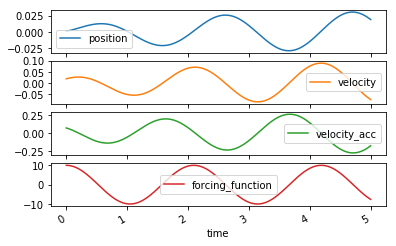

In [26]:
traj = sys.sinusoidal_forcing_response(10.0, 3.0, 5)
traj.plot(subplots=True);

In [27]:
# write your answer here

# Higher than natural frequency

Subject the system to $F(t) = 10 \cos(10t)$ with the same initial conditions as the previous case. This frequency is well below the natural frequency. Simulate for 5, 10, 20, and 50 seconds.

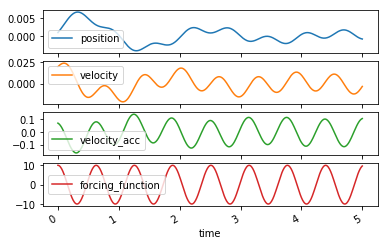

In [28]:
traj = sys.sinusoidal_forcing_response(10.0, 10.0, 5)
traj.plot(subplots=True);

**Excersise**

What do you observe about how the vibration behavior changes with respect to the forcing amplitude and frequency? How does the amplitude and frequency of the position trajectory change with respect to the forcing function? Create a interactive plot where you can adjust the forcing amplitude and frequency and observe the change in position over a 30 second simulation.

In [29]:
# write your answer here

# Transient and Steady State Behavior

When you increase the simulation time long enough in all of the above forced responses, you should see that there is more unpredictable behavior at the beginning of the response and that in the later portion of the response the system gets into a very predictable sinusoidal motion. What is the frequency of the motion after about 10 seconds of simulation? Do you recognize this frequency?

In [30]:
# write answer here

The underdamped regime of motion for this system occurs with a damping coefficient value as about $60.33 < c < 603.32$ kg/s.

In [31]:
from scipy.optimize import curve_fit

In [32]:
def cosine_func(times, amp, freq, phase_angle):
    return amp * np.cos(freq * times - phase_angle)

**Exercise**

Using the curve fit tool and a fitting function that looks like $X\cos(\omega t - \theta)$ to fit the steady state behavior of the position trajectory ($t > 10$s or so, use `traj[m:]` to get just the last `m` seconds). With the damping ratio set at 100 kg/s make a plot of the position amplitude as a function of forcing frequences $1.0 < \omega < 10.0$ rad/s. Use a forcing amplitude of 10 N. Plot a vertical line using `ax.axvline()`.

```python
Fo = 10.0  # N

frequencies = np.linspace(1.0, 10.0, num=100)
   
sys.constants['damping'] = 100  # kg/s
    
amplitudes = []
    
for omega in frequencies:
    # write the code for the loop here

fig, ax = plt.subplots(1, 1, sharex=True)
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('Steady state amplitude [m]') 

# write the plot commands here
```

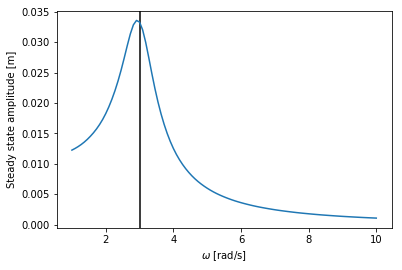

In [33]:
Fo = 10.0  # N

frequencies = np.linspace(1.0, 10.0, num=100)
   
sys.constants['damping'] = 100  # kg/s
    
amplitudes = []
    
for omega in frequencies:
    traj = sys.sinusoidal_forcing_response(Fo, omega, 20.0)
    popt, pcov = curve_fit(cosine_func,
                           traj[10:].index, traj[10:].position,
                           p0=(Fo, omega, 0.05))
    amplitudes.append(abs(popt[0]))

amplitudes = np.array(amplitudes)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('Steady state amplitude [m]') 

ax.axvline(np.sqrt(sys.constants['stiffness'] / sys.constants['mass']), color='black')
ax.plot(frequencies, amplitudes);

In [34]:
# write you answer here

**Exercise**

Now let's plot a new line on the plot for different values of damping coefficients, instead of a single value. You can use a *nested loop* to cycle through frequencies for each damping ratio. Use 5 equally spaced values of $60 < c < 600$ and the same parameters as above. Add a legend to show which color line corresponds to what damping coefficient.

```python
Fo = 10.0  # N

dampings = np.linspace(60.0, 600.0, num=5)
frequencies = np.linspace(1.0, 10.0, num=100)
results = []

for c in dampings:
    
    # set the damping
    
    amplitudes = []
    
    for omega in frequencies:
        # write this portion
    
    amplitudes = np.array(amplitudes)
    
    # store the amplitudes in the results list

fig, ax = plt.subplots(1, 1, sharex=True)
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('Steady state amplitude [m]') 

ax.axvline(np.sqrt(sys.constants['stiffness'] / sys.constants['mass']), color='black')

for amps in results:
    ax.plot(frequencies, amps)

# add legend
```

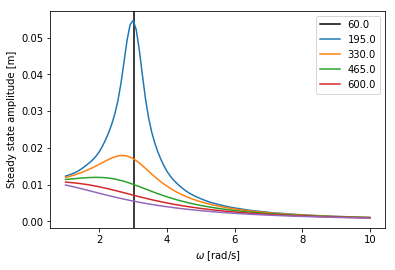

In [35]:
Fo = 10.0  # N

dampings = np.linspace(60.0, 600.0, num=5)
frequencies = np.linspace(1.0, 10.0, num=100)
results = []

for c in dampings:
    
    sys.constants['damping'] = c
    
    amplitudes = []
    
    for omega in frequencies:
        traj = sys.sinusoidal_forcing_response(Fo, omega, 20.0)
        popt, pcov = curve_fit(cosine_func,
                               traj[10:].index, traj[10:].position,
                               p0=(Fo, omega, 0.05))
        amplitudes.append(np.abs(popt[0]))
    
    amplitudes = np.array(amplitudes)
    
    results.append(amplitudes)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.set_xlabel('$\omega$ [rad/s]')
ax.set_ylabel('Steady state amplitude [m]') 

ax.axvline(np.sqrt(sys.constants['stiffness'] / sys.constants['mass']), color='black')

for amps in results:
    ax.plot(frequencies, amps)

ax.legend(dampings);

In [36]:
# write your answer here

# The frequency response

The plot you created above is called a *frequency response plot* it shows how the magnitude of the steady state response to a sinusoidal forcing. The X axis is the forcing frequency and the Y axis is the amplitude of the position oscillation. The frequency response plot also typically includes a plot of the position's steady state phase shift angle as a function of the forcing frequency too. 

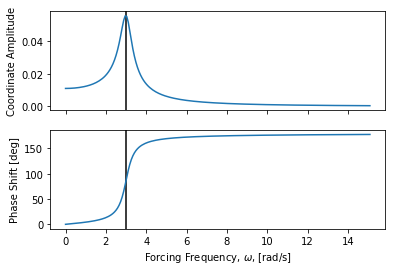

In [37]:
sys.constants['damping'] = 60
sys.frequency_response_plot(10.0);

**Exerice**

Create an interactive plot using the `sys.frequency_response_plot()` function with a slider for the damping coefficient that goes from $60 < c < 600$ with an appropriate interval spacing. You can access the lines in the plot like so:

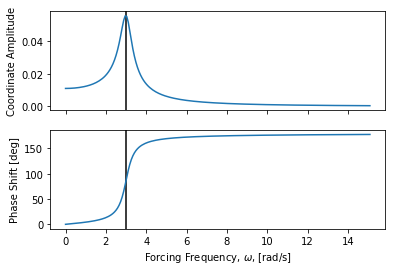

In [38]:
axes = sys.frequency_response_plot(10.0)
amp_line = axes[0].lines[1]
phase_line = axes[1].lines[1]

You can get the frequencies in the plot from:

In [39]:
frequencies = amp_line.get_xdata()

Write a plot update function that looks like:

```python
def update(damping):
    # code that modifies the plot
```

You can use `sys.frequency_response()` to get the amplitude and phase values.

In [40]:
def update(damping):
    sys.constants['damping'] = damping
    amp, phase = sys.frequency_response(frequencies, 10.0)
    amp_line.set_ydata(amp)
    phase_line.set_ydata(np.rad2deg(phase))

In [41]:
# write answer here

In [42]:
interact(update, damping=(60, 600))

<function __main__.update>